In [919]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [920]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      31599 non-null  object 
 1   Property_Type           31599 non-null  object 
 2   Property_Area           31599 non-null  int64  
 3   Number_of_Windows       30266 non-null  float64
 4   Number_of_Doors         31599 non-null  int64  
 5   Furnishing              30771 non-null  object 
 6   Frequency_of_Powercuts  30490 non-null  float64
 7   Power_Backup            31599 non-null  object 
 8   Water_Supply            31599 non-null  object 
 9   Traffic_Density_Score   31599 non-null  float64
 10  Crime_Rate              30970 non-null  object 
 11  Dust_and_Noise          30600 non-null  object 
 12  Air_Quality_Index       31599 non-null  float64
 13  Neighborhood_Review     31599 non-null  float64
 14  Habitability_score      31599 non-null

In [921]:
object_cols = df.select_dtypes('object').columns
object_cols

Index(['Id', 'Property_Type', 'Furnishing', 'Power_Backup', 'Water_Supply',
       'Crime_Rate', 'Dust_and_Noise'],
      dtype='object')

Get all object data type data from the dataset

In [922]:
df['Frequency_of_Powercuts'].value_counts()

Frequency_of_Powercuts
0.0    19560
1.0     7998
2.0     1955
3.0      977
Name: count, dtype: int64

In [923]:
test['Frequency_of_Powercuts'].value_counts()

Frequency_of_Powercuts
0.0    4911
1.0    2012
2.0     486
3.0     217
Name: count, dtype: int64

In [924]:
df_obj = df[object_cols]
test_obj = test[object_cols]
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              31599 non-null  object
 1   Property_Type   31599 non-null  object
 2   Furnishing      30771 non-null  object
 3   Power_Backup    31599 non-null  object
 4   Water_Supply    31599 non-null  object
 5   Crime_Rate      30970 non-null  object
 6   Dust_and_Noise  30600 non-null  object
dtypes: object(7)
memory usage: 1.7+ MB


In [925]:
df_obj['Property_Type'].value_counts()

Property_Type
Apartment             11673
Single-family home     9146
Duplex                 4671
Bungalow               3392
Container Home         2310
#R%$G&867               407
Name: count, dtype: int64

In [926]:
df_obj['Power_Backup'].value_counts()

Power_Backup
No               23796
Yes               7124
NOT MENTIONED      679
Name: count, dtype: int64

For some object type data, I did Ordinal Encoding according to the social experience for get better performance for our model. they are Power_backup, water_supply,Furnishing,crime_rate,Dust_and_Noise

In [927]:
Cat = ['NOT MENTIONED','No','Yes']
Ord_encoder = OrdinalEncoder(categories=[Cat])


df_obj[['Power_Backup']] = Ord_encoder.fit_transform(df_obj[['Power_Backup']])
test_obj[['Power_Backup']] = Ord_encoder.fit_transform(test_obj[['Power_Backup']])

C:\Users\123da\AppData\Local\Temp\ipykernel_10732\800452200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj[['Power_Backup']] = Ord_encoder.fit_transform(df_obj[['Power_Backup']])
C:\Users\123da\AppData\Local\Temp\ipykernel_10732\800452200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_obj[['Power_Backup']] = Ord_encoder.fit_transform(test_obj[['Power_Backup']])


In [928]:
df_obj['Power_Backup'].head()

0    1.0
1    1.0
2    1.0
3    2.0
4    1.0
Name: Power_Backup, dtype: float64

In [929]:
df.head()

,Id,Property_Type,Property_Area,Number_of_Windows,Number_of_Doors,Furnishing,Frequency_of_Powercuts,Power_Backup,Water_Supply,Traffic_Density_Score,Crime_Rate,Dust_and_Noise,Air_Quality_Index,Neighborhood_Review,Habitability_score
0,0x21e3,Apartment,106,NaN,1,Semi_Furnished,0.0,No,Once in a day - Morning,5.89,Slightly below average,Medium,90.0,3.86,71.98
1,0x68d4,Apartment,733,2.0,2,Unfurnished,1.0,No,Once in a day - Evening,4.37,Well below average,Medium,96.0,3.55,71.20
2,0x7d81,Apartment,737,4.0,2,Fully Furnished,0.0,No,Once in a day - Morning,7.45,Slightly below average,Medium,121.0,3.81,71.39
3,0x7a57,Apartment,900,3.0,2,Unfurnished,2.0,Yes,Once in a day - Morning,6.16,Well above average,Medium,100.0,1.34,31.46
4,0x9409,Bungalow,2238,14.0,6,Fully Furnished,0.0,No,All time,5.46,Well below average,Medium,116.0,4.77,93.70


In [930]:
df_obj['Water_Supply'].value_counts()

Water_Supply
All time                   15585
Once in a day - Morning     7887
Once in a day - Evening     6300
Once in two days            1569
NOT MENTIONED                258
Name: count, dtype: int64

In [931]:
df['Water_Supply'].value_counts()

Water_Supply
All time                   15585
Once in a day - Morning     7887
Once in a day - Evening     6300
Once in two days            1569
NOT MENTIONED                258
Name: count, dtype: int64

In [932]:
Cat_WS = ['NOT MENTIONED','Once in two days','Once in a day - Evening','Once in a day - Morning','All time']
Ord_encoder = OrdinalEncoder(categories=[Cat_WS])


df_obj[['Water_Supply']] = Ord_encoder.fit_transform(df_obj[['Water_Supply']])
test_obj[['Water_Supply']] = Ord_encoder.fit_transform(test_obj[['Water_Supply']])

C:\Users\123da\AppData\Local\Temp\ipykernel_10732\4042785014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj[['Water_Supply']] = Ord_encoder.fit_transform(df_obj[['Water_Supply']])
C:\Users\123da\AppData\Local\Temp\ipykernel_10732\4042785014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_obj[['Water_Supply']] = Ord_encoder.fit_transform(test_obj[['Water_Supply']])


In [933]:
# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data using the encoder
encoded_data = encoder.fit_transform(df_obj[['Property_Type']])
encoded_data_test = encoder.fit_transform(test_obj[['Property_Type']])

# Convert the encoded data into a DataFrame
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['Property_Type']))
test_encoded = pd.DataFrame(encoded_data_test.toarray(), columns=encoder.get_feature_names_out(['Property_Type']))
df_encoded.head()

,Property_Type_#R%$G&867,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0


Used OneHotEncoder to encode Property_Type for get numerical values to the data

In [934]:
df_obj.head()

,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,0x21e3,Apartment,Semi_Furnished,1.0,3.0,Slightly below average,Medium
1,0x68d4,Apartment,Unfurnished,1.0,2.0,Well below average,Medium
2,0x7d81,Apartment,Fully Furnished,1.0,3.0,Slightly below average,Medium
3,0x7a57,Apartment,Unfurnished,2.0,3.0,Well above average,Medium
4,0x9409,Bungalow,Fully Furnished,1.0,4.0,Well below average,Medium


In [935]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              31599 non-null  object 
 1   Property_Type   31599 non-null  object 
 2   Furnishing      30771 non-null  object 
 3   Power_Backup    31599 non-null  float64
 4   Water_Supply    31599 non-null  float64
 5   Crime_Rate      30970 non-null  object 
 6   Dust_and_Noise  30600 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.7+ MB


In [936]:
df_obj.isnull().sum()

Id                  0
Property_Type       0
Furnishing        828
Power_Backup        0
Water_Supply        0
Crime_Rate        629
Dust_and_Noise    999
dtype: int64

In [937]:
imputer = SimpleImputer(strategy='most_frequent')

cols = ['Furnishing','Crime_Rate','Dust_and_Noise']

df_obj[cols] = pd.DataFrame(imputer.fit_transform(df_obj[cols]), columns=cols)
test_obj[cols] = pd.DataFrame(imputer.fit_transform(test_obj[cols]), columns=cols)

C:\Users\123da\AppData\Local\Temp\ipykernel_10732\1315202074.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj[cols] = pd.DataFrame(imputer.fit_transform(df_obj[cols]), columns=cols)
C:\Users\123da\AppData\Local\Temp\ipykernel_10732\1315202074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_obj[cols] = pd.DataFrame(imputer.fit_transform(test_obj[cols]), columns=cols)


Handled all missing values in columns which having missing values of object type data by using SimpleImputer

In [938]:
df_obj['Furnishing'].value_counts()

Furnishing
Semi_Furnished     17142
Unfurnished         8279
Fully Furnished     6178
Name: count, dtype: int64

In [939]:
Cat_F = ['NOT MENTIONED','Fully Furnished','Semi_Furnished','Unfurnished']
Ord_encoder = OrdinalEncoder(categories=[Cat_F])


df_obj[['Furnishing']] = Ord_encoder.fit_transform(df_obj[['Furnishing']])
test_obj[['Furnishing']] = Ord_encoder.fit_transform(test_obj[['Furnishing']])

C:\Users\123da\AppData\Local\Temp\ipykernel_10732\3514461255.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj[['Furnishing']] = Ord_encoder.fit_transform(df_obj[['Furnishing']])
C:\Users\123da\AppData\Local\Temp\ipykernel_10732\3514461255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_obj[['Furnishing']] = Ord_encoder.fit_transform(test_obj[['Furnishing']])


In [940]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              31599 non-null  object 
 1   Property_Type   31599 non-null  object 
 2   Furnishing      31599 non-null  float64
 3   Power_Backup    31599 non-null  float64
 4   Water_Supply    31599 non-null  float64
 5   Crime_Rate      31599 non-null  object 
 6   Dust_and_Noise  31599 non-null  object 
dtypes: float64(3), object(4)
memory usage: 1.7+ MB


In [941]:
df_obj['Crime_Rate'].value_counts()

Crime_Rate
Well below average        16162
Slightly below average     9334
Slightly above average     4216
Well above average         1887
Name: count, dtype: int64

In [942]:
Cat_CR= ['NOT MENTIONED','Well above average','Slightly above average','Slightly below average','Well below average']
Ord_encoder = OrdinalEncoder(categories=[Cat_CR])


df_obj[['Crime_Rate']] = Ord_encoder.fit_transform(df_obj[['Crime_Rate']])
test_obj[['Crime_Rate']] = Ord_encoder.fit_transform(test_obj[['Crime_Rate']])

C:\Users\123da\AppData\Local\Temp\ipykernel_10732\2645270972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj[['Crime_Rate']] = Ord_encoder.fit_transform(df_obj[['Crime_Rate']])
C:\Users\123da\AppData\Local\Temp\ipykernel_10732\2645270972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_obj[['Crime_Rate']] = Ord_encoder.fit_transform(test_obj[['Crime_Rate']])


In [943]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              31599 non-null  object 
 1   Property_Type   31599 non-null  object 
 2   Furnishing      31599 non-null  float64
 3   Power_Backup    31599 non-null  float64
 4   Water_Supply    31599 non-null  float64
 5   Crime_Rate      31599 non-null  float64
 6   Dust_and_Noise  31599 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.7+ MB


In [944]:
df_obj['Dust_and_Noise'].value_counts()

Dust_and_Noise
Medium    27375
High       2572
Low        1652
Name: count, dtype: int64

In [945]:
Cat_DN= ['NOT MENTIONED','High','Medium','Low']
Ord_encoder = OrdinalEncoder(categories=[Cat_DN])


df_obj[['Dust_and_Noise']] = Ord_encoder.fit_transform(df_obj[['Dust_and_Noise']])
test_obj[['Dust_and_Noise']] = Ord_encoder.fit_transform(test_obj[['Dust_and_Noise']])


C:\Users\123da\AppData\Local\Temp\ipykernel_10732\3692693844.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obj[['Dust_and_Noise']] = Ord_encoder.fit_transform(df_obj[['Dust_and_Noise']])
C:\Users\123da\AppData\Local\Temp\ipykernel_10732\3692693844.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_obj[['Dust_and_Noise']] = Ord_encoder.fit_transform(test_obj[['Dust_and_Noise']])


In [946]:
Cat_DN[1]



'High'

In [947]:
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              31599 non-null  object 
 1   Property_Type   31599 non-null  object 
 2   Furnishing      31599 non-null  float64
 3   Power_Backup    31599 non-null  float64
 4   Water_Supply    31599 non-null  float64
 5   Crime_Rate      31599 non-null  float64
 6   Dust_and_Noise  31599 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.7+ MB


In [948]:
DF = pd.concat([df_obj,df_encoded],axis=1)
test_obj_new = pd.concat([test_obj,test_encoded],axis=1)

In [949]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                31599 non-null  object 
 1   Property_Type                     31599 non-null  object 
 2   Furnishing                        31599 non-null  float64
 3   Power_Backup                      31599 non-null  float64
 4   Water_Supply                      31599 non-null  float64
 5   Crime_Rate                        31599 non-null  float64
 6   Dust_and_Noise                    31599 non-null  float64
 7   Property_Type_#R%$G&867           31599 non-null  float64
 8   Property_Type_Apartment           31599 non-null  float64
 9   Property_Type_Bungalow            31599 non-null  float64
 10  Property_Type_Container Home      31599 non-null  float64
 11  Property_Type_Duplex              31599 non-null  float64
 12  Prop

In [950]:
DF = DF.drop(['Property_Type'],axis=1)
test_obj_new = test_obj_new.drop(['Property_Type'],axis=1)

In [951]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                31599 non-null  object 
 1   Furnishing                        31599 non-null  float64
 2   Power_Backup                      31599 non-null  float64
 3   Water_Supply                      31599 non-null  float64
 4   Crime_Rate                        31599 non-null  float64
 5   Dust_and_Noise                    31599 non-null  float64
 6   Property_Type_#R%$G&867           31599 non-null  float64
 7   Property_Type_Apartment           31599 non-null  float64
 8   Property_Type_Bungalow            31599 non-null  float64
 9   Property_Type_Container Home      31599 non-null  float64
 10  Property_Type_Duplex              31599 non-null  float64
 11  Property_Type_Single-family home  31599 non-null  float64
dtypes: f

In [952]:
ID = DF['Id']
T_ID = test_obj_new['Id']

In [953]:
DF = DF.drop(['Id'],axis=1)
test_obj_new = test_obj_new.drop(['Id'],axis=1)

In [954]:
df_num = df.drop(object_cols, axis=1)
test_num = test.drop(object_cols, axis=1)

In [955]:
df_updated = pd.concat([df_num,DF],axis=1)
test_updated = pd.concat([test_num,test_obj_new],axis=1)

In [956]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property_Area                     31599 non-null  int64  
 1   Number_of_Windows                 30266 non-null  float64
 2   Number_of_Doors                   31599 non-null  int64  
 3   Frequency_of_Powercuts            30490 non-null  float64
 4   Traffic_Density_Score             31599 non-null  float64
 5   Air_Quality_Index                 31599 non-null  float64
 6   Neighborhood_Review               31599 non-null  float64
 7   Habitability_score                31599 non-null  float64
 8   Furnishing                        31599 non-null  float64
 9   Power_Backup                      31599 non-null  float64
 10  Water_Supply                      31599 non-null  float64
 11  Crime_Rate                        31599 non-null  float64
 12  Dust

In [957]:
imputer = SimpleImputer(strategy='mean')

imputer.fit(df_updated)

df_filled = pd.DataFrame(imputer.fit_transform(df_updated), columns=df_updated.columns)
test_filled = pd.DataFrame(imputer.fit_transform(test_updated), columns=test_updated.columns)

Used mean value for numerical data for handle missing value using SimpleImputer

In [958]:
df_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property_Area                     31599 non-null  float64
 1   Number_of_Windows                 31599 non-null  float64
 2   Number_of_Doors                   31599 non-null  float64
 3   Frequency_of_Powercuts            31599 non-null  float64
 4   Traffic_Density_Score             31599 non-null  float64
 5   Air_Quality_Index                 31599 non-null  float64
 6   Neighborhood_Review               31599 non-null  float64
 7   Habitability_score                31599 non-null  float64
 8   Furnishing                        31599 non-null  float64
 9   Power_Backup                      31599 non-null  float64
 10  Water_Supply                      31599 non-null  float64
 11  Crime_Rate                        31599 non-null  float64
 12  Dust

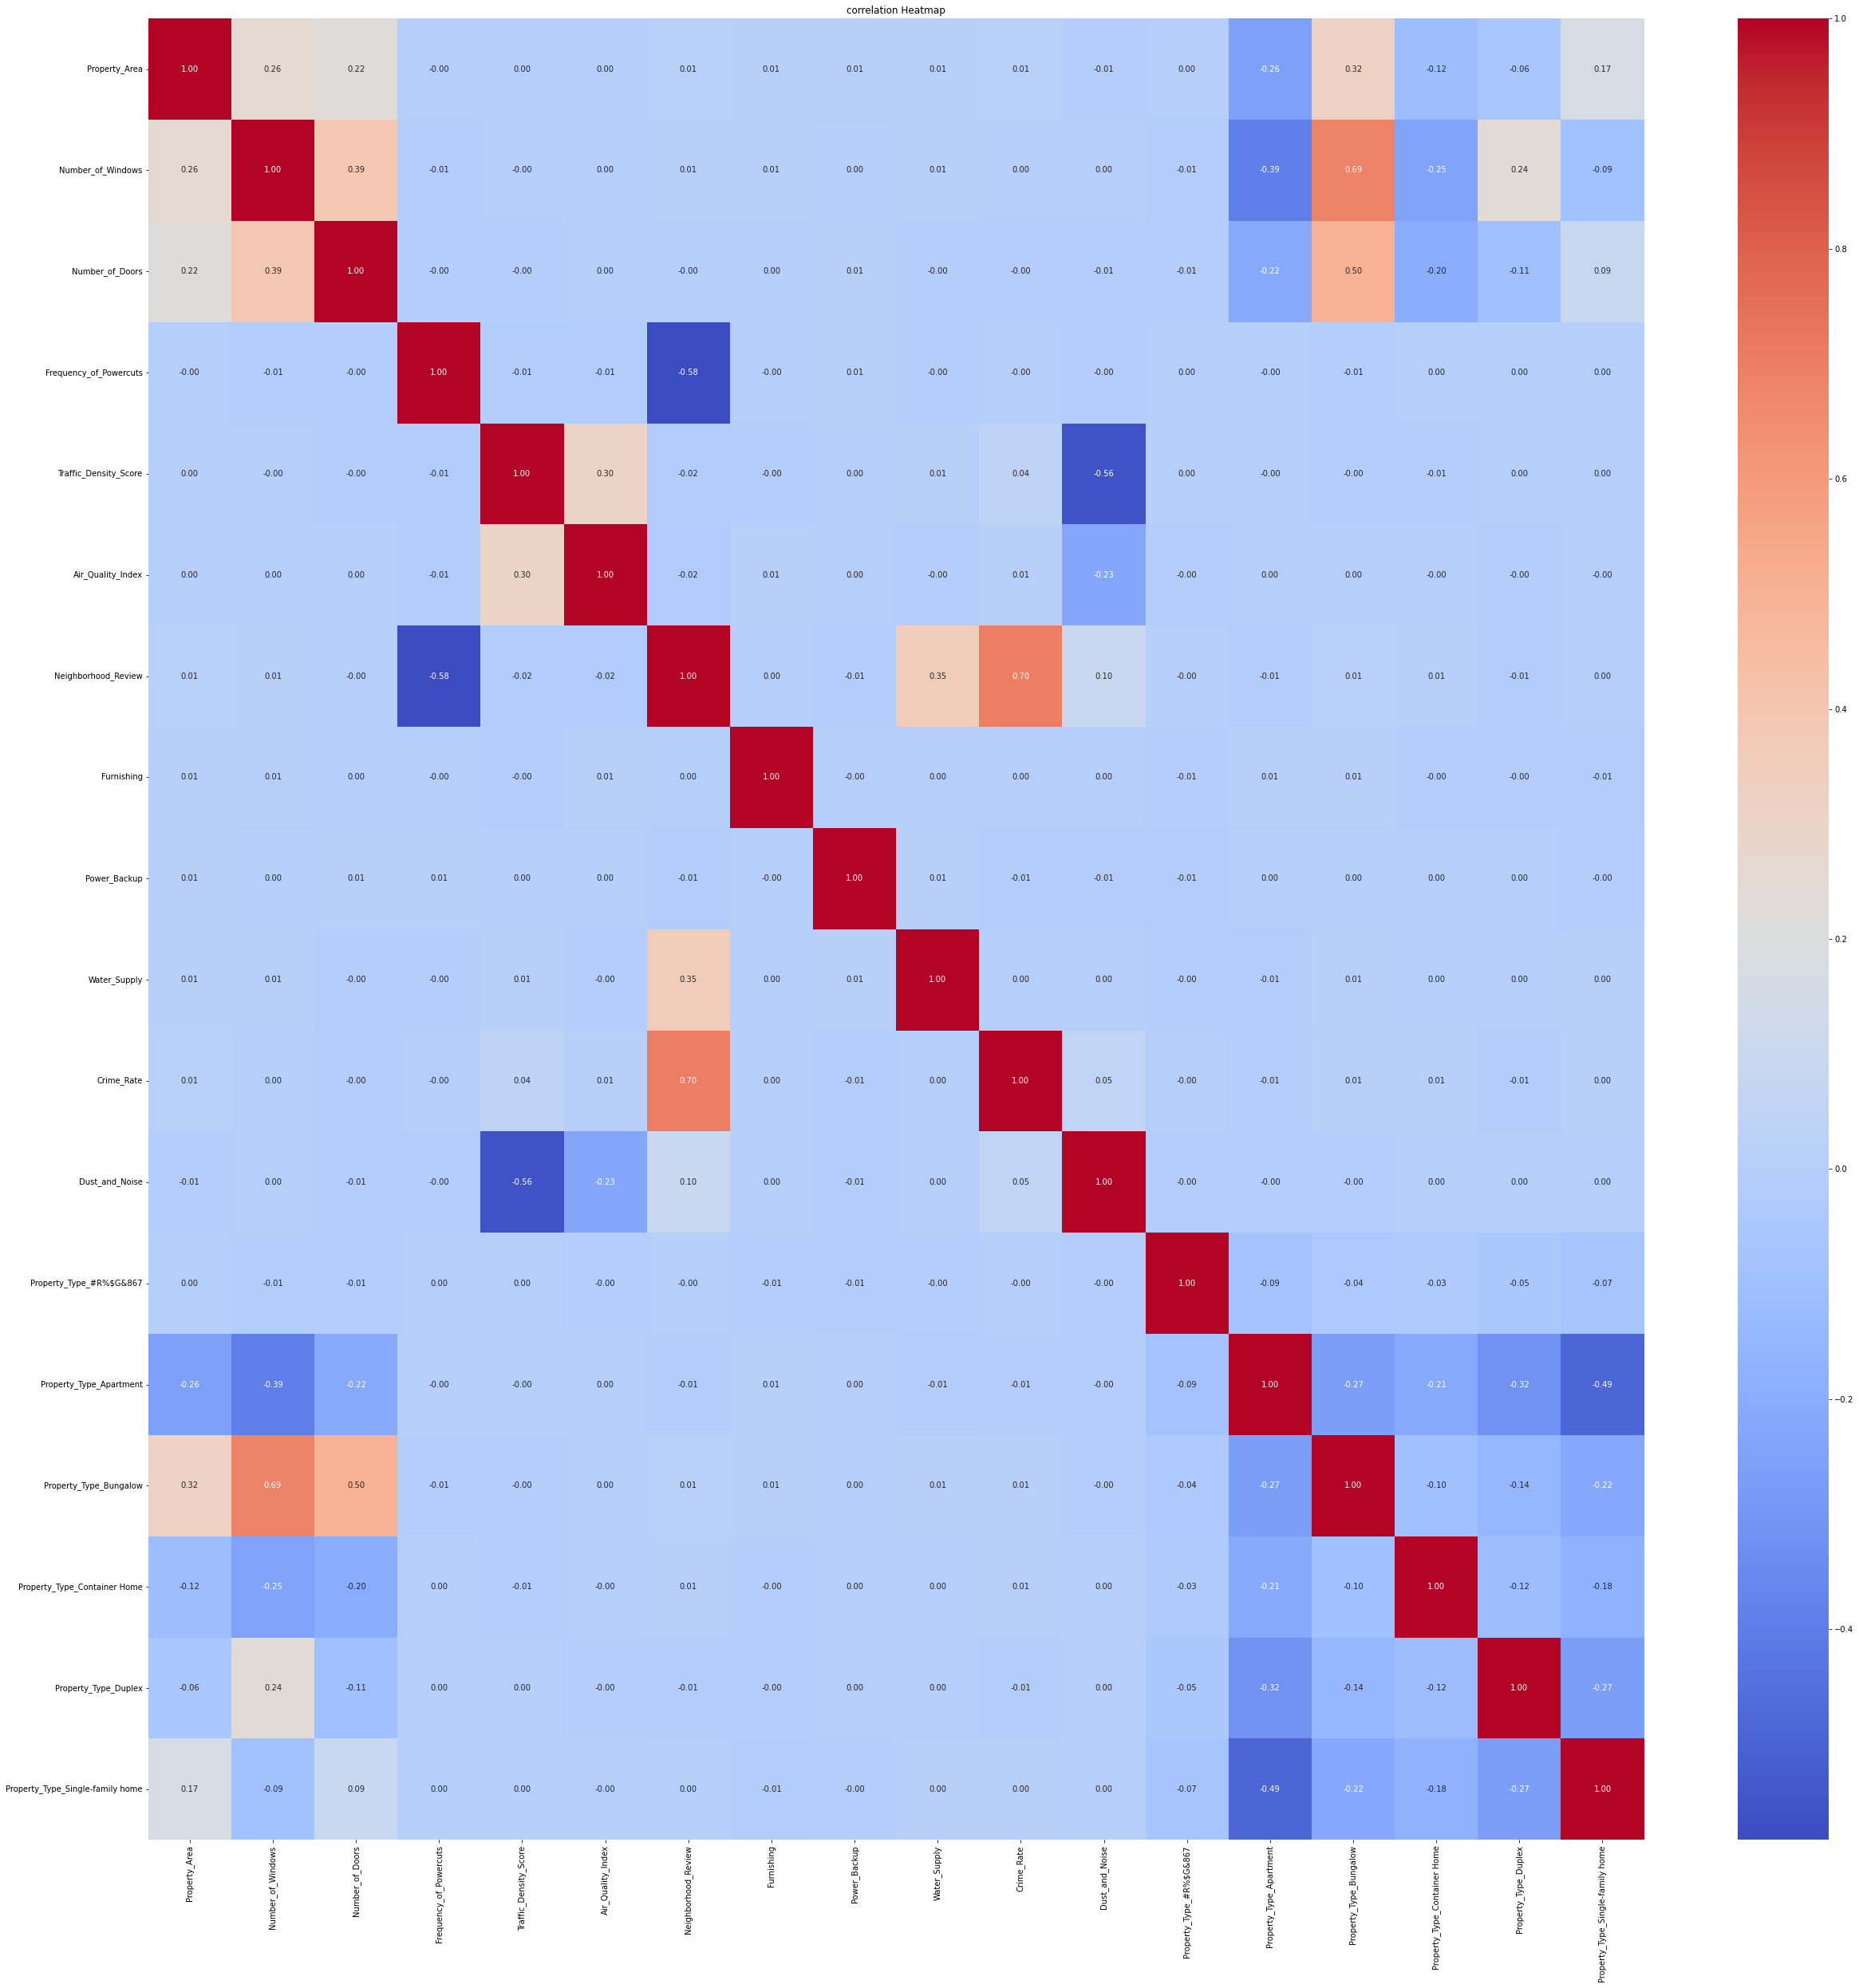

In [959]:
X = df_filled.drop(['Habitability_score'] , axis=1)
y = df['Habitability_score']  

correlation_matrix = X.corr()
plt.figure(figsize=(42,42))
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm',fmt=".2f")
plt.title("correlation Heatmap")
plt.show()

In [960]:
# Set a threshold for correlation value
threshold = 0.8

# Find columns with high correlation values
highly_correlated_columns = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_columns.add(colname)

# Drop the highly correlated columns
X.drop(highly_correlated_columns, axis=1, inplace=True)
test_filled.drop(highly_correlated_columns, axis=1, inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31599 entries, 0 to 31598
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Property_Area                     31599 non-null  float64
 1   Number_of_Windows                 31599 non-null  float64
 2   Number_of_Doors                   31599 non-null  float64
 3   Frequency_of_Powercuts            31599 non-null  float64
 4   Traffic_Density_Score             31599 non-null  float64
 5   Air_Quality_Index                 31599 non-null  float64
 6   Neighborhood_Review               31599 non-null  float64
 7   Furnishing                        31599 non-null  float64
 8   Power_Backup                      31599 non-null  float64
 9   Water_Supply                      31599 non-null  float64
 10  Crime_Rate                        31599 non-null  float64
 11  Dust_and_Noise                    31599 non-null  float64
 12  Prop

In [961]:
# Assuming X_train, X_test, y_train, y_test are your training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=105, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [962]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: {:.2f}".format(mse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R-squared Score: {:.2f}".format(r2))

Mean Squared Error: 35.14
Mean Absolute Error: 4.49
R-squared Score: 0.82


In [963]:
rf_model.fit(X,y)

RandomForestRegressor(n_estimators=105, random_state=42)

In [964]:
y_pred = rf_model.predict(test_filled)

# Create a DataFrame with the predicted values
predictions_df = pd.DataFrame({'Habitability_score': [round(pred, 2) for pred in y_pred]})
predictions_df = pd.concat([T_ID,predictions_df], axis=1)

# Save the DataFrame to a CSV file
predictions_df.to_csv('predicted_values_11.csv', index=False)

